# <font color = 'lightblue'> **Lexical Analysis of _Wikipedia's_ and _Google Cloud's_ Articles on 'Artificial Intelligence'**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Dall-e_3_%28jan_%2724%29_artificial_intelligence_icon.png/800px-Dall-e_3_%28jan_%2724%29_artificial_intelligence_icon.png" width="500">




In this notebook, I am performing a simple lexical analysis of how two different sources, _Wikipedia_ and _Google Cloud_, write about **Artificial Intelligence**.

The purpose is to see how language choices might reflect different purposes or audiences of these platforms.

While _Wikipedia_ is community-edited and more expansive, _Google Cloud_ is professionally curated and tends to be more concise and explanatory.

This notebook includes:
- Extracting text from the websites using _BeautifulSoup_,
- Basic text processing with **NLTK**,
- Basic Python coding,
- and, of course, some Markdown formatting practice. 😸

**<font color='lightblue'>Important Info</font>**

The last update of this notebook was on June 16th 2025. The content of those websites may change overtime and thus the results may not be up-to-date anymore.

##<font color = 'lightblue'> _Wikipedia_

Before I use it for scraping the website, I must import _BeautifulSoup_.

In [1]:
import requests

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

Now I can move on to the actual scraping.

In [2]:
#Cooking the soup
page1 = requests.get("https://en.wikipedia.org/wiki/Artificial_intelligence")


soup1 = BeautifulSoup(page1.content, 'html.parser')

#Extracting paragraphs
paras1 = soup1.find_all('p')

#Cleaning the text
only_text1 = []
for el in paras1:
  if len(el.getText().strip()) > 0:
    only_text1.append(el.getText())

text1 = " ".join(only_text1)

Now that we have our text cleaned, we can use NLTK to process it! But first, of course, **import**.

In [3]:
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Finally I can divide this website into **tokens**, then into just **lowercase words** - it will be easier to analyse!

**Also!** Let's not forget about removing _stopwords_ - they are unnecesasry when it comes to lexical analysis, so we will just remove them from our list of words.

In [4]:
#tokenizing
all_tokens1 = nltk.word_tokenize(text1)

#check
#print(all_tokens1)

#removing punctuation, so we only have words and adding lowercase words
stop_words = [
    "a", "an", "the", "and", "or", "but", "if", "while", "is", "are",
    "was", "were", "be", "been", "being", "to", "of", "in", "that", "it",
    "for", "on", "with", "as", "by", "at", "from", "this", "which", "you",
    "your", "I", "we", "they", "he", "she", "him", "her", "his", "their",
    "my", "mine", "our", "ours", "not", "so", "can", "will", "just"
]

words1 = []
for t in all_tokens1:
  if t.isalpha():
    word = t.lower()
    if word not in stop_words:
      words1.append(word)

#check
#print(words1)

Next, using rather simple code, I can extract **the most common word** and how many times it occured in the text.

In [6]:
word_count1 = {}
for w in words1:
  if w in word_count1:
    word_count1[w] += 1
  else:
    word_count1[w] = 1

#check
#print(word_count1)

most_frequent_word1 = ""
max_count1 = 0

for word, count in word_count1.items():
    if count > max_count1:
        most_frequent_word1 = word
        max_count1 = count
print("The most frequent word is:", most_frequent_word1)

most_occuring_num1 = max(word_count1.values())

print("And it occurs", most_occuring_num1, "times")

The most frequent word is: ai
And it occurs 227 times


My code is rather simple, but works well! However, there are better ways to count all of the words in the text. For this we need **Counter**. Let's import it!

In [7]:
from collections import Counter

Counter, as the name suggests, counts all the words in a given list and puts them in order, but for this analysis, let's just focus on the first 50.

In [8]:
# counting the words
c1 = Counter(words1)

# 50 most common
c1.most_common()[0:50]

[('ai', 227),
 ('intelligence', 63),
 ('such', 59),
 ('learning', 59),
 ('used', 58),
 ('data', 56),
 ('have', 52),
 ('artificial', 42),
 ('machine', 41),
 ('has', 39),
 ('other', 38),
 ('research', 35),
 ('human', 34),
 ('use', 34),
 ('these', 34),
 ('problems', 34),
 ('models', 33),
 ('many', 32),
 ('may', 31),
 ('power', 30),
 ('networks', 27),
 ('problem', 27),
 ('most', 27),
 ('neural', 26),
 ('some', 26),
 ('reasoning', 25),
 ('search', 25),
 ('knowledge', 25),
 ('about', 25),
 ('also', 24),
 ('more', 23),
 ('systems', 22),
 ('what', 22),
 ('applications', 21),
 ('including', 21),
 ('deep', 21),
 ('researchers', 20),
 ('there', 20),
 ('would', 20),
 ('than', 20),
 ('google', 19),
 ('generative', 19),
 ('language', 19),
 ('make', 19),
 ('include', 18),
 ('large', 18),
 ('using', 18),
 ('us', 18),
 ('nuclear', 18),
 ('field', 17)]

Here I inlcude the words on a chart - it is much better to look at!

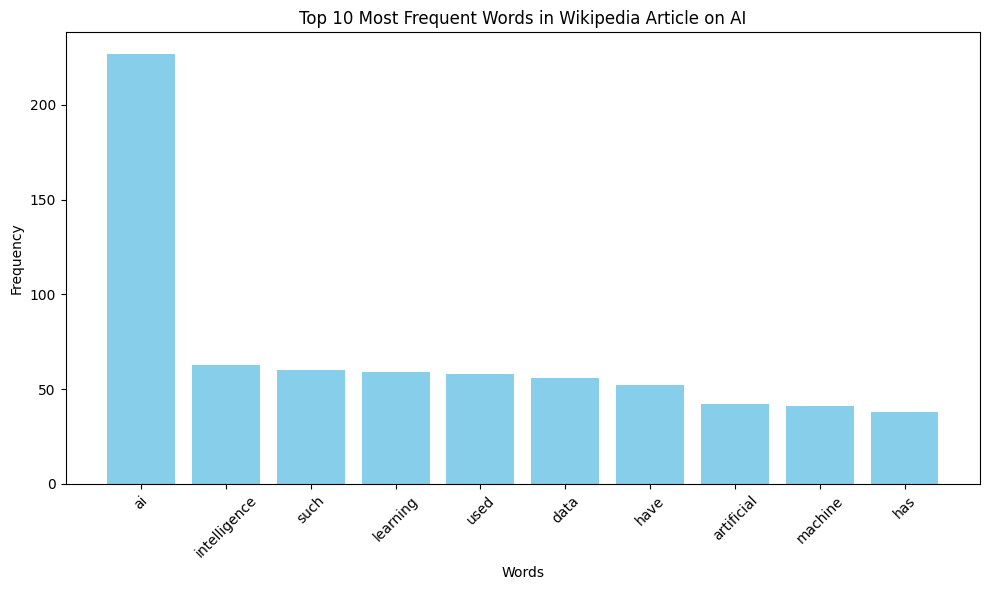

In [12]:
wiki_words = ['ai', 'intelligence', 'such', 'learning', 'used', 'data', 'have', 'artificial', 'machine', 'has']
wiki_counts = [227, 63, 60, 59, 58, 56, 52, 42, 41, 38]

plt.figure(figsize=(10, 6))
plt.bar(wiki_words, wiki_counts, color='skyblue')
plt.title('Top 10 Most Frequent Words in Wikipedia Article on AI')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Great! Now let's check _Google Cloud_.

##<font color = 'lightblue'> _Google Cloud_

Here I am going through exactly the same processes, so there's no need to explain it all again. Let's move quickly to the findings.

In [13]:
#Cooking the soup
page2 = requests.get("https://cloud.google.com/learn/what-is-artificial-intelligence")


soup2 = BeautifulSoup(page2.content, 'html.parser')

#Extracting paragraphs
paras2 = soup2.find_all('p')

#Cleaning the text
only_text2 = []
for el in paras2:
  if len(el.getText().strip()) > 0:
    only_text2.append(el.getText())

text2 = " ".join(only_text2)

In [14]:
#tokenizing
all_tokens2 = nltk.word_tokenize(text2)

#check
#print(all_tokens2)

#removing punctuation, so we only have words and adding lowercase words
words2 = []
stop_words = [
    "a", "an", "the", "and", "or", "but", "if", "while", "is", "are",
    "was", "were", "be", "been", "being", "to", "of", "in", "that", "it",
    "for", "on", "with", "as", "by", "at", "from", "this", "which", "you",
    "your", "I", "we", "they", "he", "she", "him", "her", "his", "their",
    "my", "mine", "our", "ours", "not", "so", "can", "will", "just"
]
for t in all_tokens2:
  if t.isalpha():
    word = t.lower()
    if word not in stop_words:
      words2.append(word)

#check
#print(words2)

In [15]:
word_count2 = {}

for w in words2:
  if w in word_count2:
    word_count2[w] += 1
  else:
    word_count2[w] = 1

#check
#print(word_count2)

most_frequent_word2 = ""
max_count2 = 0

for word, count in word_count2.items():
    if count > max_count2:
        most_frequent_word2 = word
        max_count2 = count
print("The most frequent word is:", most_frequent_word2)

most_occuring_num2 = max(word_count2.values())

print("And it occurs", most_occuring_num2, "times")

The most frequent word is: data
And it occurs 32 times


**Here are our most common words!!**

In [16]:
# counting the words
c2 = Counter(words2)

# 50 most common
c2.most_common()[0:50]

[('data', 32),
 ('ai', 31),
 ('neural', 22),
 ('learning', 21),
 ('networks', 18),
 ('artificial', 17),
 ('intelligence', 13),
 ('human', 13),
 ('used', 13),
 ('machine', 11),
 ('layers', 10),
 ('network', 10),
 ('what', 9),
 ('more', 8),
 ('use', 8),
 ('often', 8),
 ('layer', 8),
 ('feedforward', 7),
 ('perform', 6),
 ('recognition', 6),
 ('analytics', 6),
 ('deep', 6),
 ('through', 6),
 ('tasks', 6),
 ('time', 6),
 ('output', 6),
 ('language', 5),
 ('make', 5),
 ('into', 5),
 ('would', 5),
 ('based', 5),
 ('patterns', 5),
 ('may', 5),
 ('algorithms', 5),
 ('instance', 5),
 ('training', 5),
 ('algorithm', 5),
 ('when', 5),
 ('model', 5),
 ('simple', 5),
 ('one', 5),
 ('other', 5),
 ('image', 5),
 ('analyze', 4),
 ('modern', 4),
 ('images', 4),
 ('free', 4),
 ('google', 4),
 ('cloud', 4),
 ('learn', 4)]

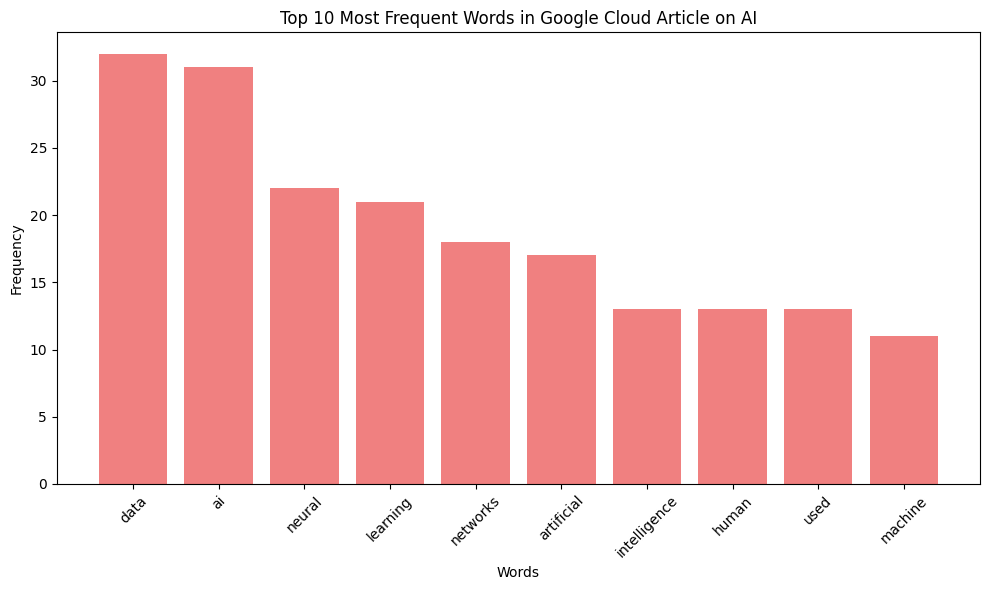

In [17]:
cloud_words = ['data', 'ai', 'neural', 'learning', 'networks', 'artificial', 'intelligence', 'human', 'used', 'machine']
cloud_counts = [32, 31, 22, 21, 18, 17, 13, 13, 13, 11]

plt.figure(figsize=(10, 6))
plt.bar(cloud_words, cloud_counts, color='lightcoral')
plt.title('Top 10 Most Frequent Words in Google Cloud Article on AI')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##<font color = 'lightblue'> Analysis

### Some Observations

In _Wikipedia_, the most frequent word is **"AI"** (227 times), showing that the article focuses on the term itself. Other frequent words include **"intelligence"**, **"learning"**, **"used"**, and **"data"** — pointing to a technical and academic focus.

In _Google Cloud_, the top word is **"data"** (32 times), followed by **"AI"** (31 times) and **"neural"** (22 times). _Google Cloud_ focuses more on the **conceptual building blocks** of AI, such as **"data"**, **"networks"**, **"layers"**, and **"algorithms"**, indicating a structured breakdown of the topic.



### Limitations
One important limitation of this comparison is that the two articles differ significantly in length. The _Wikipedia_ article on AI is much longer and more detailed than the _Google Cloud_ entry, which is more concise and structured.

Because of this, some of the observed differences in word frequency may be influenced simply by **the length** of each article, and so each of them had to explore different aspects of the topic. For example, Wikipedia might mention more subfields, real-world applications, or research areas simply because it includes more content overall.

A more accurate comparison would involve e.g. comparing articles of similar length.

## <font color = 'lightblue'> Conclusions


This simple linguistic comparison shows that different sources use language in distinct ways when writing about the same topic — in this case, Artificial Intelligence.

_Wikipedia_ emphasizes terms like "AI", "intelligence", "learning", and "models", suggesting a broad and technical overview that touches on many subfields and applications.

_Google Cloud_ on the other hand, highlights words like "data", "neural", "layers", and "algorithms", pointing to a more structured, educational explanation of core concepts.

While both articles cover similar topics, their vocabulary suggests different purposes: _Wikipedia_ aims to present wide range of aspects needed to be taken into consideration, while _Google Cloud_ focuses on clarity and foundational understanding.


## <font color = 'lightblue'> Sources

Wikipedia contributors. 2024. _Artificial intelligence_. Retrieved June 16, 2025 (https://en.wikipedia.org/wiki/Artificial_intelligence).

Google Cloud. n.d. _What is Artificial Intelligence?_ Retrieved June 16, 2025 (https://cloud.google.com/learn/what-is-artificial-intelligence).
